# __Solving flow in a DFN (steady state)__

### Problem statement

We focus on solving the Darcy problem, considering a fractured rock with impervious rock matrix.
<br>
Flow equations are solved on a previously meshed DFN.

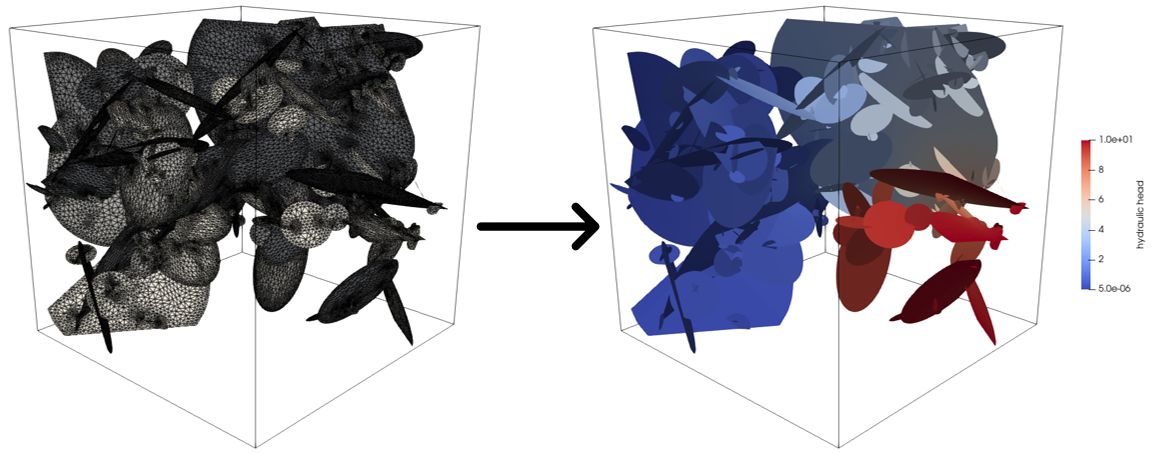


### Theoretical background

In DFN.Lab, the Darcy equations are solved with a mixed-hybrid finite-element method. 
<br>The mixed-hybrid finite element method introduce a Lagrange multiplier to ensure mass conservation at fracture intersections [(Maryška et al., 2005)](https://link.springer.com/article/10.1007/s10596-005-0152-3). 


### What will you learn ?
* Solving flow on a meshed DFN
* Get some flow metrics (indicators)

### DFN.Lab model
(see the [Meshing tutorial](008-Meshing.ipynb)).

The required modules are __Flow__, __Mesh__, __Hydro__, __BoundaryCondition__, __Basis__ and __IO__. <br/>

In [1]:
import dfnlab.Basis as basis
import dfnlab.BoundaryCondition as bc
import dfnlab.Hydro as hydro
import dfnlab.Mesh as mesh 
import dfnlab.Flow as flow
import dfnlab.IO as io

import os

-------------------------------------

### Meshing
A previously meshed DFN is loaded.

24


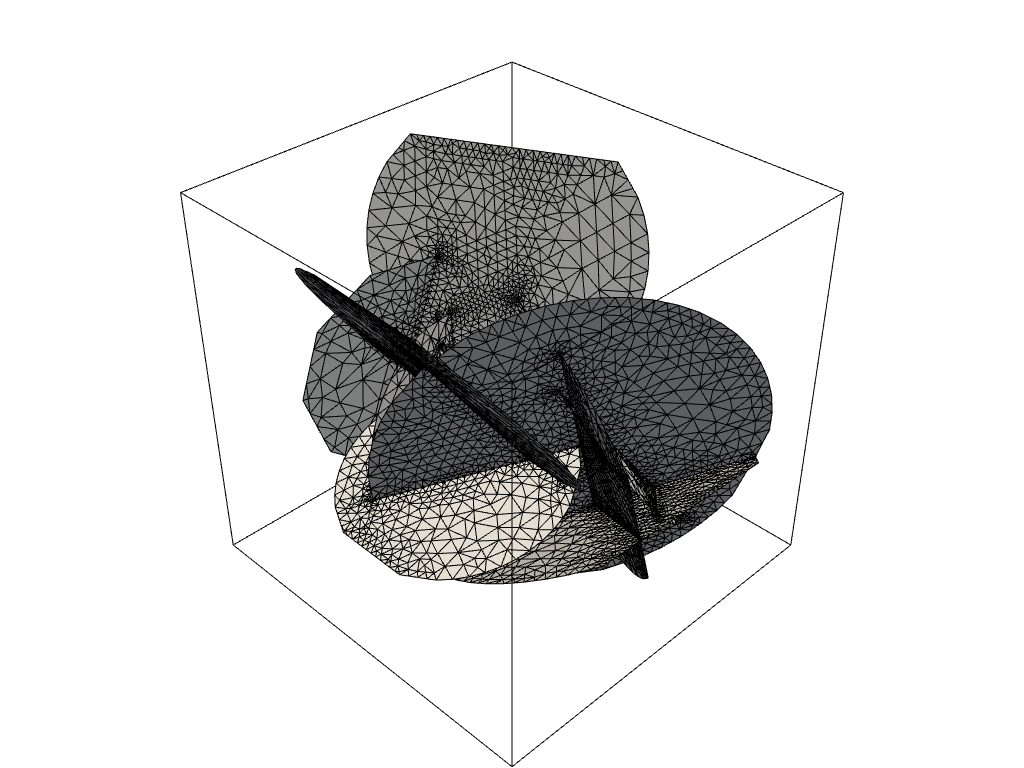

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet = basis.DFN(the_system)
io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk")
fnet.computeIntersections()

mesh = mesh.DFNMesh(fnet)  
mesh.loadMesh("sources/MeshExamples/KTestFine/")

path = os.getcwd()
pathFolder = os.getcwd()+"/Tmp"
from sources.functions import plot_mesh
if not os.path.isdir(pathFolder) :
    os.mkdir(pathFolder)
plot_mesh(mesh,pathFolder+"/tutoFlow_Mesh1")

### Boundary conditions
A permeameter boundary condition is applied in the z-direction.

In [3]:
boundaries = bc.DomainBoundaryCondition()
boundaries.setPermeameterCondition(fnet,10,3)

### Hydraulic properties
Fracture transmissivities are set to 1 for all fractures.

In [4]:
transmissivities = hydro.HydraulicProperties(fnet)
transmissivities.setConstant(1)

### __Solving the Darcy equation__

Solving the flow in DFN.Lab returns a _Flow_ object which contains hydraulic head and velocity fields.

In [5]:
flow_system = flow.solveDarcyProblem(mesh,boundaries,transmissivities)

Linear system building 
Time: to build the system: 0.0866599 seconds. 
Taking account of the boundary conditions
Linear System solving
Time: to solve the system (intermediaire 1): 0.0253238 seconds. 
Time: to solve the system (intermediaire 2): 0.0018556 seconds. 
Time: to reconstruct the velocities: 0.0232062 seconds. 


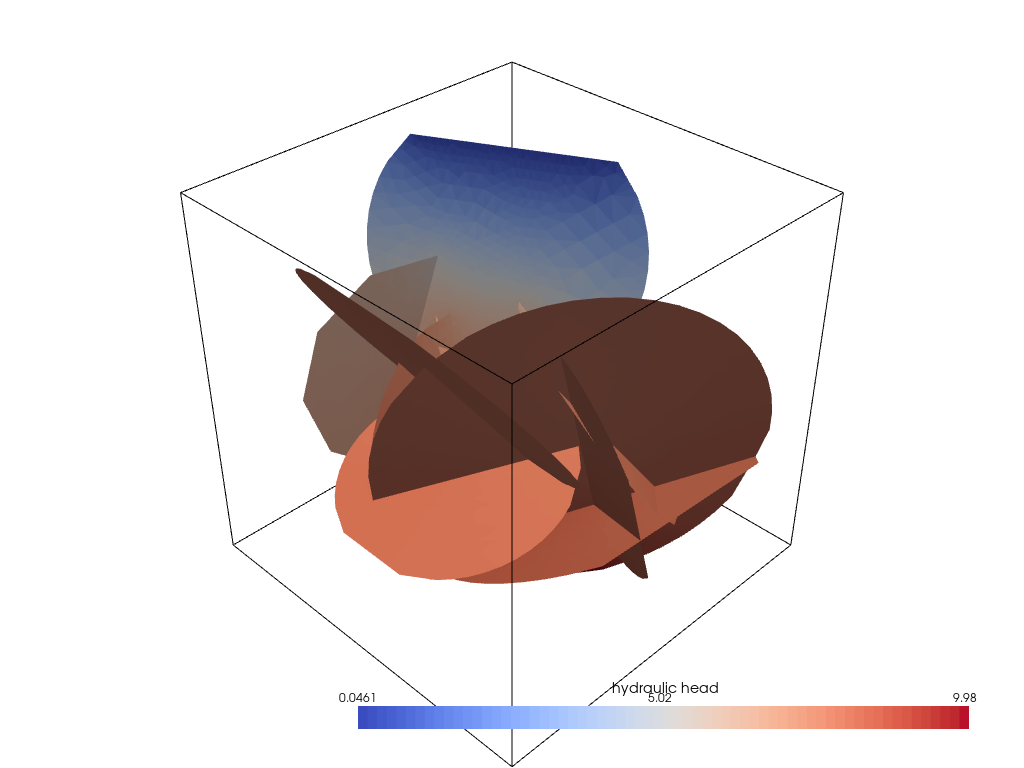

In [6]:
plot_mesh(mesh,pathFolder+"/tutoFlow_Mesh1",flow_system.head(),"hydraulic head")

### Get Indicators values

The _Flow_ object provides also some indicators (flow metrics). The logic is the same for every indicators.
<br>
There are 2 possibilities :
* A global value for the whole DFN
* A particular value for one object (Fracture, Intersection, Wells ...)

We here only show some simple examples. For detailed explanations and more elaborate applications we kindly refer to the documentation. 

#### Global values

In [7]:
inputFlow = flow_system.getIndicatorsValue("inputInFractures")
print("Input flow: {}".format(inputFlow))

outputFlow = flow_system.getIndicatorsValue("outputInFractures")
print("Output flow: {}".format(outputFlow))

print('Relative difference between input and output: '+ ( abs(inputFlow + outputFlow) / (outputFlow+ 1e-18)).__str__())

totalFluxInSystem = flow_system.getIndicatorsValue("totalFluxInSystem")
print("Total flux is: {}".format(totalFluxInSystem))

# The hydraulic conductivity is not automatically computed, the next line is needed to get value

k = flow_system.getIndicatorsValue("hydraulicConductivity")
print("Equivalent Hydraulic conductivity is: {}".format(k))

Input flow: 9.107814838530702
Output flow: -9.107814838524687
Relative difference between input and output: -6.603937788422953e-13
Total flux is: 9.107814838524133
Equivalent Hydraulic conductivity is: 0.9107814838524133
